In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
path="incident_event_log.csv"

In [94]:
# Import the Dataset
dataset = pd.read_csv(path)

In [95]:
dataset.shape

(141712, 36)

In [96]:
dataset.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/02/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/02/2016 11:29,05/03/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/02/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,01/03/2016 09:52,06/03/2016 10:00


In [97]:
dataset.info()
#missing percentage
dataset.isnull().sum() * 100 / len(dataset)
#Ok there are no null entry.
#but have many '?'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141712 non-null object
opened_by                  141712 non-null object
opened_at                  141712 non-null object
sys_created_by             141712 non-null object
sys_created_at             141712 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141712 non-null object
category                   141712 non-null object
subcategory                141712 non-null obj

number                     0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_created_by             0.0
sys_created_at             0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
location                   0.0
category                   0.0
subcategory                0.0
u_symptom                  0.0
cmdb_ci                    0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
problem_id                 0.0
rfc                        0.0
vendor                     0.0
caused_by                  0.0
closed_c

In [98]:
#set all '?' entry as null and reread
missing_values = ['?']
dataset = pd.read_csv(path, na_values = missing_values)
print(dataset.isnull().values.sum())

894597


In [99]:
dataset.isnull().sum() * 100 / len(dataset)
# the "cmdb_ci","problem_id","rfc","vendor","caused_by" columns don't have enough non-null values.  
# So, we delete these columns.

number                      0.000000
incident_state              0.000000
active                      0.000000
reassignment_count          0.000000
reopen_count                0.000000
sys_mod_count               0.000000
made_sla                    0.000000
caller_id                   0.020464
opened_by                   3.411849
opened_at                   0.000000
sys_created_by             37.453427
sys_created_at             37.453427
sys_updated_by              0.000000
sys_updated_at              0.000000
contact_type                0.000000
location                    0.053630
category                    0.055041
subcategory                 0.078328
u_symptom                  23.261262
cmdb_ci                    99.685983
impact                      0.000000
urgency                     0.000000
priority                    0.000000
assignment_group           10.029496
assigned_to                19.402732
knowledge                   0.000000
u_priority_confirmation     0.000000
n

In [100]:
dataset.drop(["cmdb_ci","problem_id","rfc","vendor","caused_by"], inplace=True, axis=1)

In [48]:
#dataset.isnull().sum() * 100 / len(dataset)

In [49]:
def print_unique():
    for mstr in dataset:
        print(mstr+":")
        print(dataset[mstr].unique()[0:10])
        print(f"category number = {len(dataset[mstr].unique())}")
#print_unique()



In [101]:
#then we covert the time column to datetime type
import datetime
#datetime.datetime.strptime("29/02/2016 15:51",'%d/%m/%Y %H:%M')
date_list=["opened_at","sys_created_at","sys_updated_at","resolved_at","closed_at"]
for mstr in date_list:
    dataset[mstr]=dataset[mstr].apply(lambda x:datetime.datetime.strptime(x,'%d/%m/%Y %H:%M')if type(x) is str else np.NaN)
#unexpectedly, it work

In [51]:
print_unique()


number:
['INC0000045' 'INC0000047' 'INC0000057' 'INC0000060' 'INC0000062'
 'INC0000063' 'INC0000064' 'INC0000065' 'INC0000066' 'INC0000067']
category number = 24918
incident_state:
['New' 'Resolved' 'Closed' 'Active' 'Awaiting User Info'
 'Awaiting Problem' 'Awaiting Vendor' 'Awaiting Evidence' '-100']
category number = 9
active:
[ True False]
category number = 2
reassignment_count:
[0 1 2 3 4 5 6 7 8 9]
category number = 28
reopen_count:
[0 1 2 3 4 5 6 7 8]
category number = 9
sys_mod_count:
[0 2 3 4 1 5 6 7 8 9]
category number = 115
made_sla:
[ True False]
category number = 2
caller_id:
['Caller 2403' 'Caller 4416' 'Caller 4491' 'Caller 3765' 'Caller 2146'
 'Caller 2838' 'Caller 5323' 'Caller 3796' 'Caller 442' 'Caller 3757']
category number = 5245
opened_by:
['Opened by  8' 'Opened by  397' 'Opened by  180' 'Opened by  131'
 'Opened by  24' 'Opened by  40' 'Opened by  433' 'Opened by  62'
 'Opened by  501' 'Opened by  301']
category number = 208
opened_at:
['2016-02-29T01:16:00.000

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null datetime64[ns]
sys_created_by             88636 non-null object
sys_created_at             88636 non-null datetime64[ns]
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null datetime64[ns]
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory             

In [53]:
#delete prefix
#unnecessary
import re
delete_prefix_list=["caller_id","opened_by","sys_created_by","sys_updated_by",
                 "location","category","subcategory","u_symptom","assignment_group",
                 "assigned_to","closed_code","resolved_by"]
c = re.compile(r'(.*?)([0-9]*)($)')
for mstr in delete_prefix_list:
    #dataset[mstr]=dataset[mstr].apply(lambda x:c.match(str(x)).group(2))
    pass

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 31 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null object
sys_created_by             88636 non-null object
sys_created_at             88636 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory                141601 non-null objec

In [55]:
dataset.describe()


,reassignment_count,reopen_count,sys_mod_count
count,141712.000000,141712.000000,141712.000000
mean,1.104197,0.021918,5.080946
std,1.734673,0.207302,7.680652
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000
50%,1.000000,0.000000,3.000000
75%,1.000000,0.000000,6.000000
max,27.000000,8.000000,129.000000


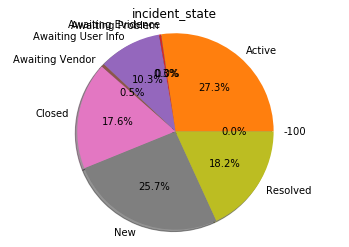

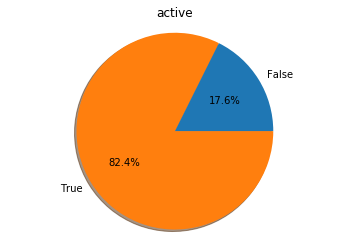

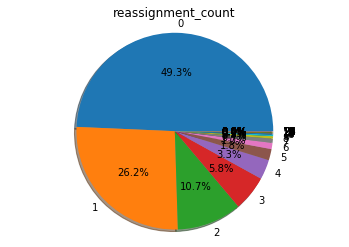

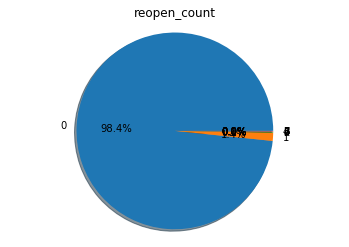

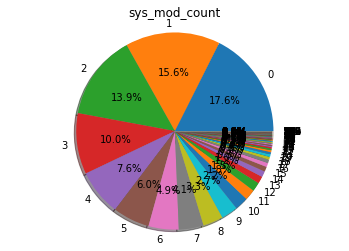

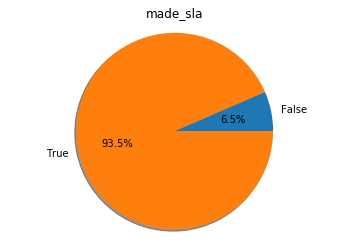

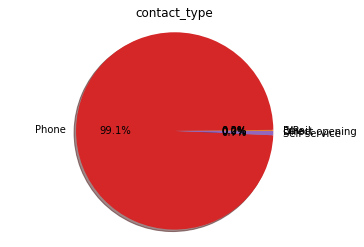

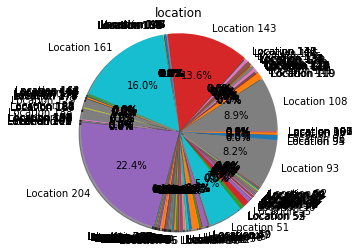

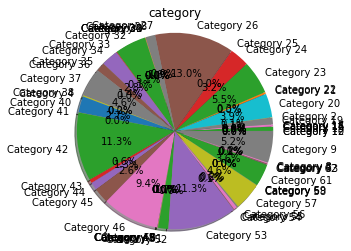

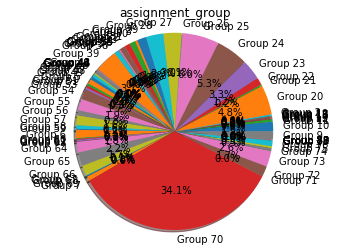

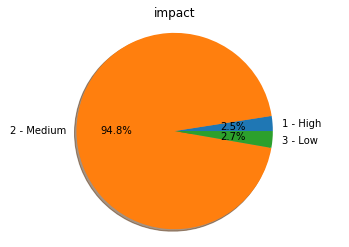

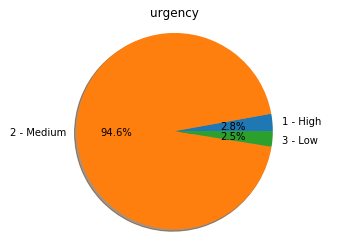

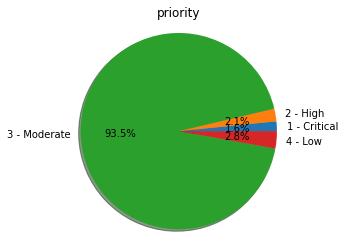

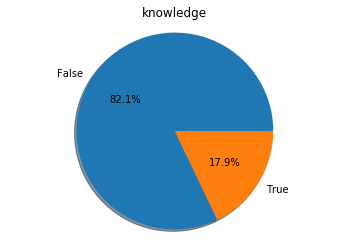

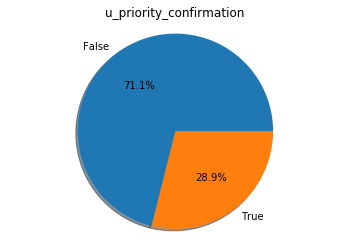

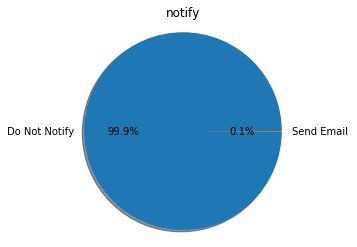

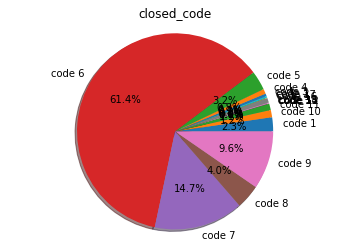

In [56]:
#draw pie barplot
import matplotlib.pyplot as plt
draw_polt=['incident_state','active','reassignment_count',
           'reopen_count','sys_mod_count','made_sla',
           'contact_type','location','category','assignment_group','impact','urgency','priority',
           'knowledge','u_priority_confirmation','notify','closed_code']
for mstr in draw_polt:
    labels = dataset[mstr].astype('category').cat.categories.tolist()
    counts = dataset[mstr].value_counts()
    sizes = [counts[var_cat] for var_cat in labels]
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
    ax1.axis('equal')
    plt.title(mstr)
    plt.show()

In [57]:
#draw time series density graph
# for mstr in date_list:
#     s=dataset[mstr]
#     s2=pd.Series(s.index.values, index=s ).resample('W').count()
#     s3=s2.to_frame()
#     s3.plot()
#     plt.show()

In [102]:
#delete the row which data is incomplete 
record=[]
for index, row in dataset.iterrows():
    if row.count()<31:
        record.append(index)
dataset=dataset.drop(record)

In [103]:
dataset.isnull().sum() * 100 / len(dataset)
#now, all row is complete



number                     0.0
incident_state             0.0
active                     0.0
reassignment_count         0.0
reopen_count               0.0
sys_mod_count              0.0
made_sla                   0.0
caller_id                  0.0
opened_by                  0.0
opened_at                  0.0
sys_created_by             0.0
sys_created_at             0.0
sys_updated_by             0.0
sys_updated_at             0.0
contact_type               0.0
location                   0.0
category                   0.0
subcategory                0.0
u_symptom                  0.0
impact                     0.0
urgency                    0.0
priority                   0.0
assignment_group           0.0
assigned_to                0.0
knowledge                  0.0
u_priority_confirmation    0.0
notify                     0.0
closed_code                0.0
resolved_by                0.0
resolved_at                0.0
closed_at                  0.0
dtype: float64

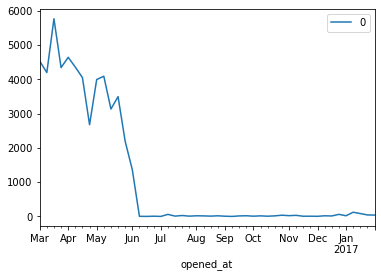

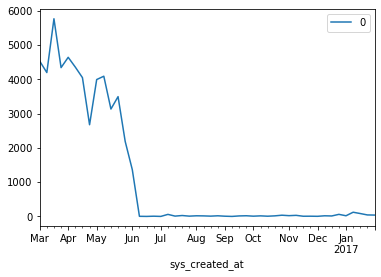

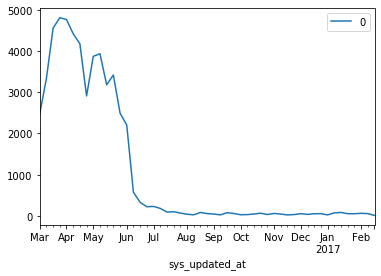

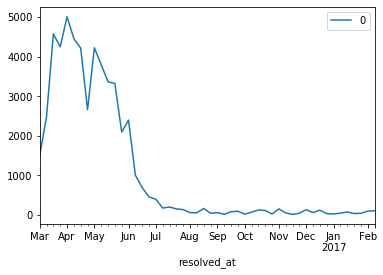

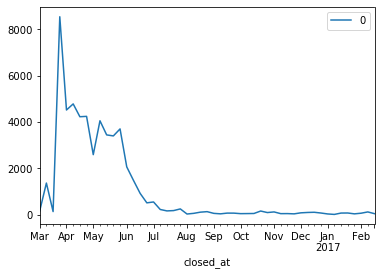

In [60]:
#time series graph after cleaning
for mstr in date_list:
    s=dataset[mstr]
    s2=pd.Series(s.index.values, index=s).resample('W').count()
    s3=s2.to_frame()
    s3.plot()
    plt.show()

In [61]:
for mstr in date_list:
    s=dataset[mstr]
    s2=pd.Series(s.index.values, index=s).resample('M').count()
    s3=s2.to_frame()
    print(s2)

opened_at
2016-02-29      546
2016-03-31    21798
2016-04-30    16089
2016-05-31    14412
2016-06-30        9
2016-07-31      102
2016-08-31       65
2016-09-30       40
2016-10-31       73
2016-11-30       64
2016-12-31      105
2017-01-31      296
Freq: M, dtype: int64
sys_created_at
2016-02-29      546
2016-03-31    21798
2016-04-30    16089
2016-05-31    14408
2016-06-30       13
2016-07-31      102
2016-08-31       65
2016-09-30       40
2016-10-31       73
2016-11-30       64
2016-12-31      105
2017-01-31      296
Freq: M, dtype: int64
sys_updated_at
2016-02-29      182
2016-03-31    18482
2016-04-30    16546
2016-05-31    14522
2016-06-30     2183
2016-07-31      459
2016-08-31      201
2016-09-30      188
2016-10-31      167
2016-11-30      158
2016-12-31      156
2017-01-31      267
2017-02-28       88
Freq: M, dtype: int64
resolved_at
2016-02-29       34
2016-03-31    16663
2016-04-30    16620
2016-05-31    13926
2016-06-30     3651
2016-07-31      681
2016-08-31      363
20

In [104]:
#reset index
dataset = dataset.reset_index(drop=True)

In [63]:
# Well, after checking and analyzing all data
# I consider only the incident solved time(time cost) is valuable to predict.
# All others are either impossible to predict or meaningless to predict.

In [105]:
#So, firstly I calculated the incident solve time
dataset["solve_time"]=dataset["resolved_at"]-dataset["opened_at"]
dataset["solve_time"].head()

0   1 days 05:12:00
1   1 days 05:12:00
2   1 days 05:12:00
3   1 days 05:12:00
4   1 days 05:12:00
Name: solve_time, dtype: timedelta64[ns]

In [65]:
'''
List the learned predicted meachine learning model:
    Decision Tree/Random Forest
    KNN
    Bayes' Classifier
    Linear/Logistic Regression with Gradient Descent
    Item-CF
    
As we hope to predict a continuous variable, but the given feature are mostly categorical(In practical concept)
I consider only the linear regression and KNN can be used in that case
'''


"\nList the learned predicted meachine learning model:\n    Decision Tree/Random Forest\n    KNN\n    Bayes' Classifier\n    Linear/Logistic Regression with Gradient Descent\n    Item-CF\n    \nAs we hope to predict a continuous variable, but the given feature are mostly categorical(In practical concept)\nI consider only the linear regression and KNN can be used in that case\n"

In [110]:
drop_column=["opened_at","sys_created_at","sys_updated_at","resolved_at","closed_at","number"]
#dataset_n=dataset.drop(drop_column, axis=1)
#dataset_n.info()


In [111]:
#use one-hot encodding method date to satisfy the requirement of sklearn.linear_model
import pandas as pd
from sklearn import preprocessing
try:
    dataset_linear_regression=dataset.drop(drop_column, axis=1)
    catColumns = dataset_linear_regression.select_dtypes(['object']).columns
    le = preprocessing.LabelEncoder()
    for col in catColumns:
        n = len(dataset_linear_regression[col].unique())
        if (n > 2):
           X = pd.get_dummies(dataset_linear_regression[col])
           #X = X.drop(X.columns[0], axis=1)
           dataset_linear_regression[X.columns] = X
           dataset_linear_regression.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
        else:
           le.fit(dataset_linear_regression[col])
           dataset_linear_regression[col] = le.transform(dataset_linear_regression[col])
except Exception as e:
    print(e)
    del dataset_linear_regression

Unable to allocate array with shape (2312, 53599) and data type uint8


In [113]:
#Well, the jupyter said the memory is not enough
#And even memory space is enough, that is bad to fit a regression model with some many columns
#so, I only set the categorical features with less than cate=10 categories
cate=10
dataset_linear_regression=dataset.drop(drop_column, axis=1)
catColumns = dataset_linear_regression.select_dtypes(['object']).columns
le = preprocessing.LabelEncoder()
for col in catColumns:
    n = len(dataset_linear_regression[col].unique())
    if (n > 2):
        if(n < cate):
            X = pd.get_dummies(dataset_linear_regression[col])       
            #X = X.drop(X.columns[0], axis=1)
            dataset_linear_regression[col+" - "+X.columns] = X
        dataset_linear_regression.drop(col, axis=1, inplace=True)  # drop the original categorical variable (optional)
    else:
        le.fit(dataset_linear_regression[col])
        dataset_linear_regression[col] = le.transform(dataset_linear_regression[col])

In [116]:
x = dataset_linear_regression.drop('solve_time', axis=1)
y = dataset_linear_regression['solve_time']/np.timedelta64(1, 'h')
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
reg=linreg.fit(x_train,y_train)
reg.score(x_test, y_test)
#That is say, 52% of the variability in solve_time can be explained by other features?

0.5254627049868034

In [117]:
reg.coef_
#parament high to e+13?, that's incredible

array([ 1.30364415e+13, -9.35791016e+01, -3.50768121e+02,  6.53232422e+01,
       -3.93118286e+01,  4.56541061e+01,  4.15939941e+01, -4.07978003e+01,
        1.43201164e+13,  1.43201164e+13,  1.43201164e+13,  1.43201164e+13,
        1.43201164e+13,  2.73565579e+13,  1.43201164e+13,  1.43201164e+13,
       -1.81439942e+14, -1.81439942e+14, -1.81439942e+14, -1.28423894e+14,
       -1.28423894e+14, -1.28423894e+14,  5.57230986e+12,  5.57230986e+12,
        5.57230986e+12,  3.72354648e+13,  3.72354648e+13,  3.72354648e+13,
        3.72354648e+13])

In [118]:
reg.intercept_ 
#I believe it is not make sense

239699503407747.22

In [119]:
y.head

<bound method NDFrame.head of 0        29.2
1        29.2
2        29.2
3        29.2
4        29.2
         ... 
53594    65.9
53595    65.9
53596    65.9
53597    65.9
53598    65.9
Name: solve_time, Length: 53599, dtype: float64>

In [120]:
reg.predict(x_test)

array([201.875 , -33.4375, 818.5625, ..., 258.75  , 398.25  ,  32.3125])

In [121]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
regression_results(y_test, reg.predict(x_test))

explained_variance:  0.5255
r2:  0.5255
MAE:  255.9274
MSE:  308879.0511
RMSE:  555.7689


In [ ]:
#As

In [ ]:
dataset.colu

In [122]:
event_cf_x = dataset.drop('solve_time', axis=1)

In [124]:
normalize_to=["reassignment_count","reopen_count","sys_mod_count"]

In [125]:
for i in normalize_to:
    event_cf_x=(event_cf_x[i]-event_cf_x[i].min())/(event_cf_x[i].max()-event_cf_x[i].min())

KeyError: 'reopen_count'

In [ ]:
#need normalization
def similarity(a,b):
    l=len(a)
    sim=0
    for i in range(l):
        if a[i]==b[i]:
            sim+=1
    return sim/l

In [ ]:

d = {'no': [], 'sim': [],'solve_time':[]}
simdf = pd.DataFrame(data=d)
no=100
for i in range(10000):
    if i==no:continue
    simdf = simdf.append({'no' : i , 'sim' : similarity(event_cf_x.iloc[no],event_cf_x.iloc[i]),'solve_time':y.iloc[i]} , ignore_index=True)
simdf=simdf.sort_values('sim',ascending =False)

In [ ]:
simdf.head(20)

In [ ]:
#Reference: 
#[1]do Amaral, C. A., Fantinato, M., & Peres, S. M. (2018, September). Attribute selection with filter and wrapper: an application on incident management process. In 2018 Federated Conference on Computer Science and Information Systems (FedCSIS) (pp. 679-682). IEEE.